## First Payment Default Prediction

Author: Vijendar G (vijendarreddy.g@gmail.com)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sbn
import pandas_profiling 
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
SetID                    1600 non-null int64
Time of Application      1600 non-null object
State                    1600 non-null object
Monthly Net Income       1600 non-null float64
Paycheck Net Income      1600 non-null float64
Rent or Own              1600 non-null object
Months at Residence      1600 non-null int64
Bank Account Months      1600 non-null int64
Pay Cycle                1600 non-null object
Loan Amount              1600 non-null float64
Loan Funded Date         1600 non-null object
Loan Due Date            1600 non-null object
First Payment Default    1600 non-null bool
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 151.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
SetID                    400 non-null int64
Time of Application      400 non-null object
State                    

No Missing values in given Train and test data 

In [5]:
print(train.describe())
print(test.describe())

           SetID  Monthly Net Income  Paycheck Net Income  \
count  1600.0000         1600.000000          1600.000000   
mean   1004.8700         4362.641250          2718.488750   
std     584.0755         5524.868265          4894.909919   
min       2.0000           70.000000            70.000000   
25%     492.7500         2000.000000          1250.000000   
50%    1012.5000         3200.000000          2100.000000   
75%    1514.2500         5139.000000          3500.000000   
max    2000.0000       184000.000000        184000.000000   

       Months at Residence  Bank Account Months  Loan Amount  
count          1600.000000          1600.000000  1600.000000  
mean             63.285625            24.731250   317.974619  
std              70.777592            23.414134   176.993218  
min               0.000000             3.000000   117.650000  
25%              17.000000             6.000000   235.300000  
50%              39.000000            24.000000   300.000000  
75%      

In [6]:
print(train.describe(include=['object']))

         Time of Application State Rent or Own Pay Cycle Loan Funded Date  \
count                   1600  1600        1600      1600             1600   
unique                  1590     2           2         4               73   
top     2018-03-20T13:59:32Z    CA           R  BiWeekly         12-02-18   
freq                       2  1159        1406       721               57   

       Loan Due Date  
count           1600  
unique            76  
top         30-03-18  
freq             125  


In the given data State,Rent or Own and Pay Cycle are categorical.
+ State is taking 2 distinct values.
+ Rent or Own is taking 2 different values
+ Pay cycle is having 4 distinct values/.

In [7]:
train.profile_report()

Shape of your Data Set: (1600, 13)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Since Number of Rows in data 1600 exceeds maximum, randomly sampling 1500 rows for EDA...
Total Number of Scatter Plots = 6
Could not draw Violin Plots
Nothing to add Plot not being added
All plots done
Time to run AutoViz (in seconds) = 4.869


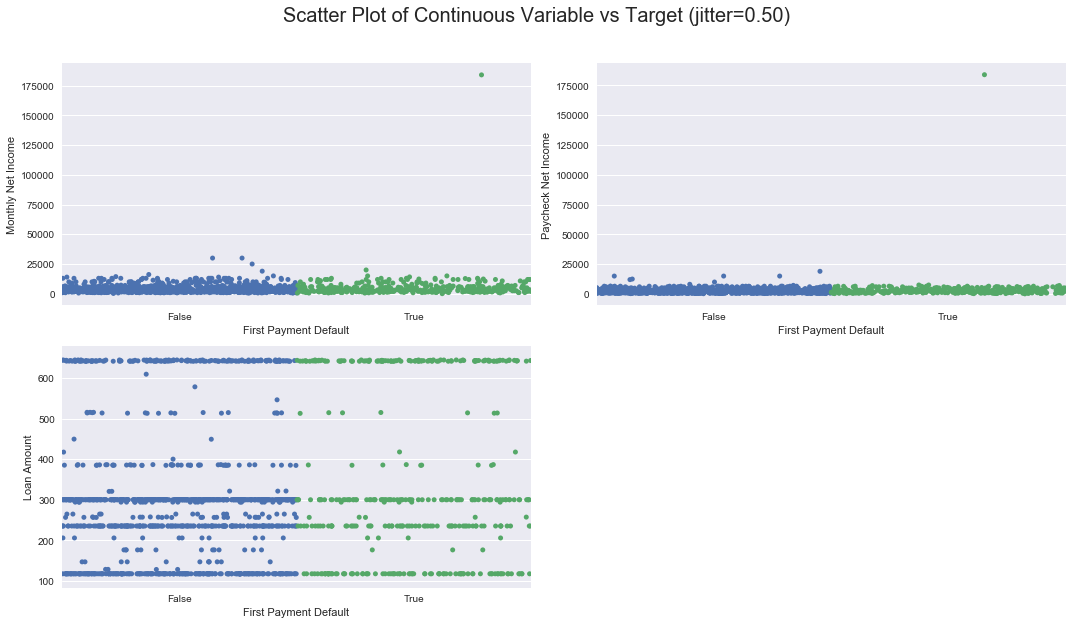

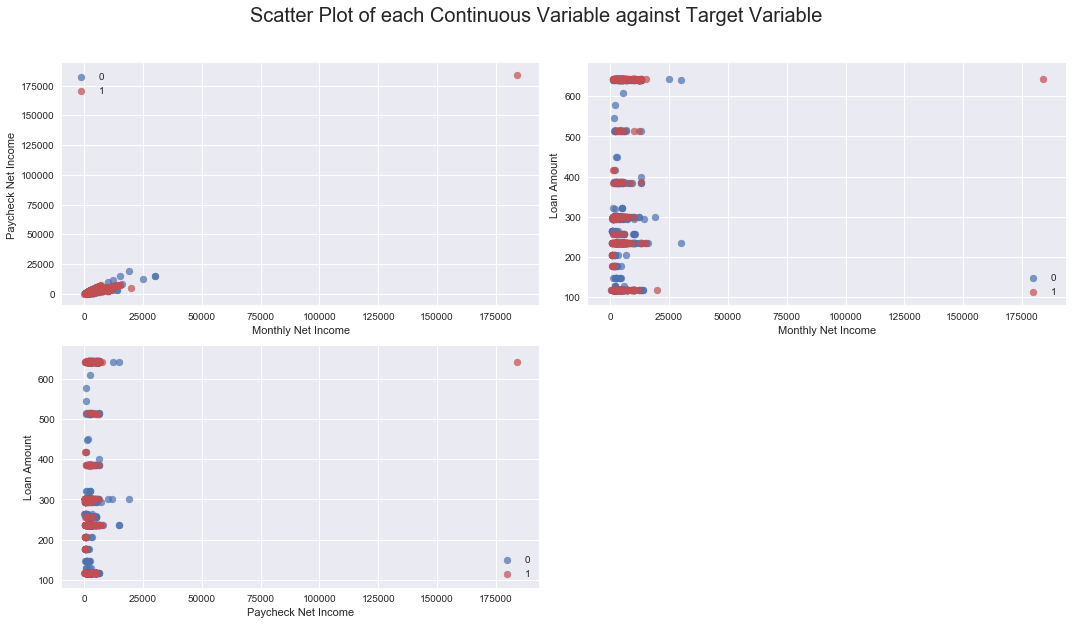

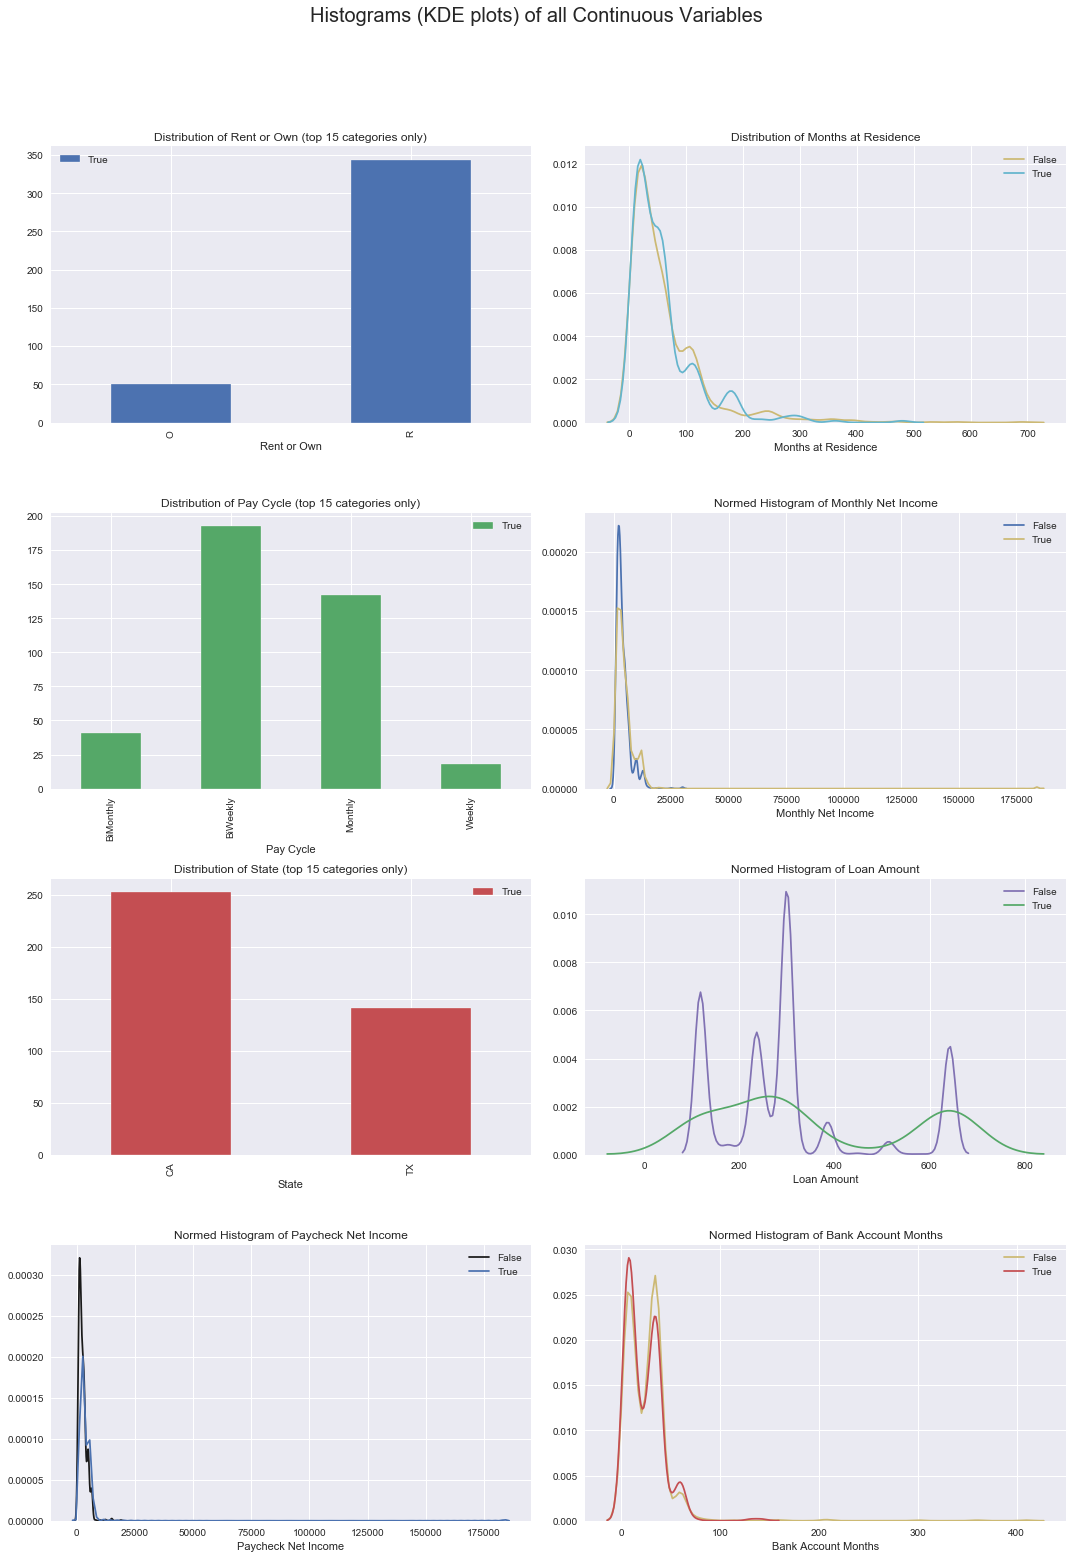

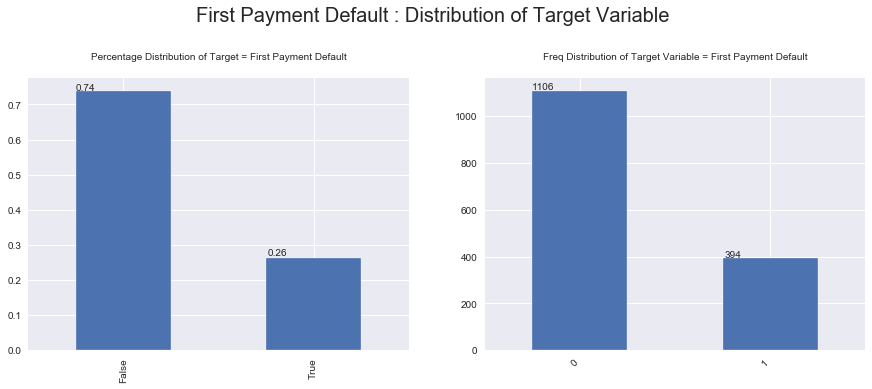

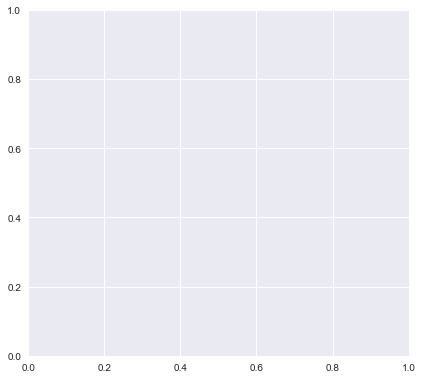

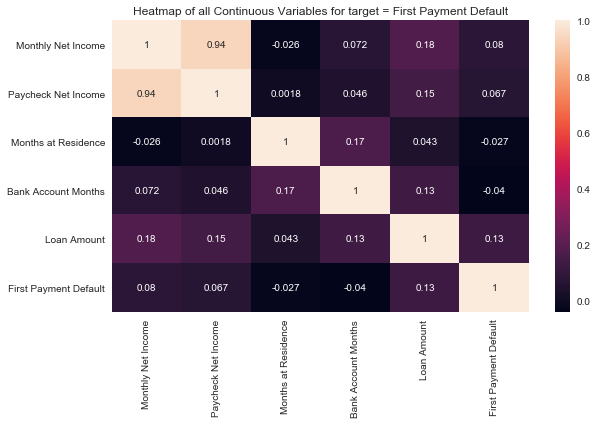

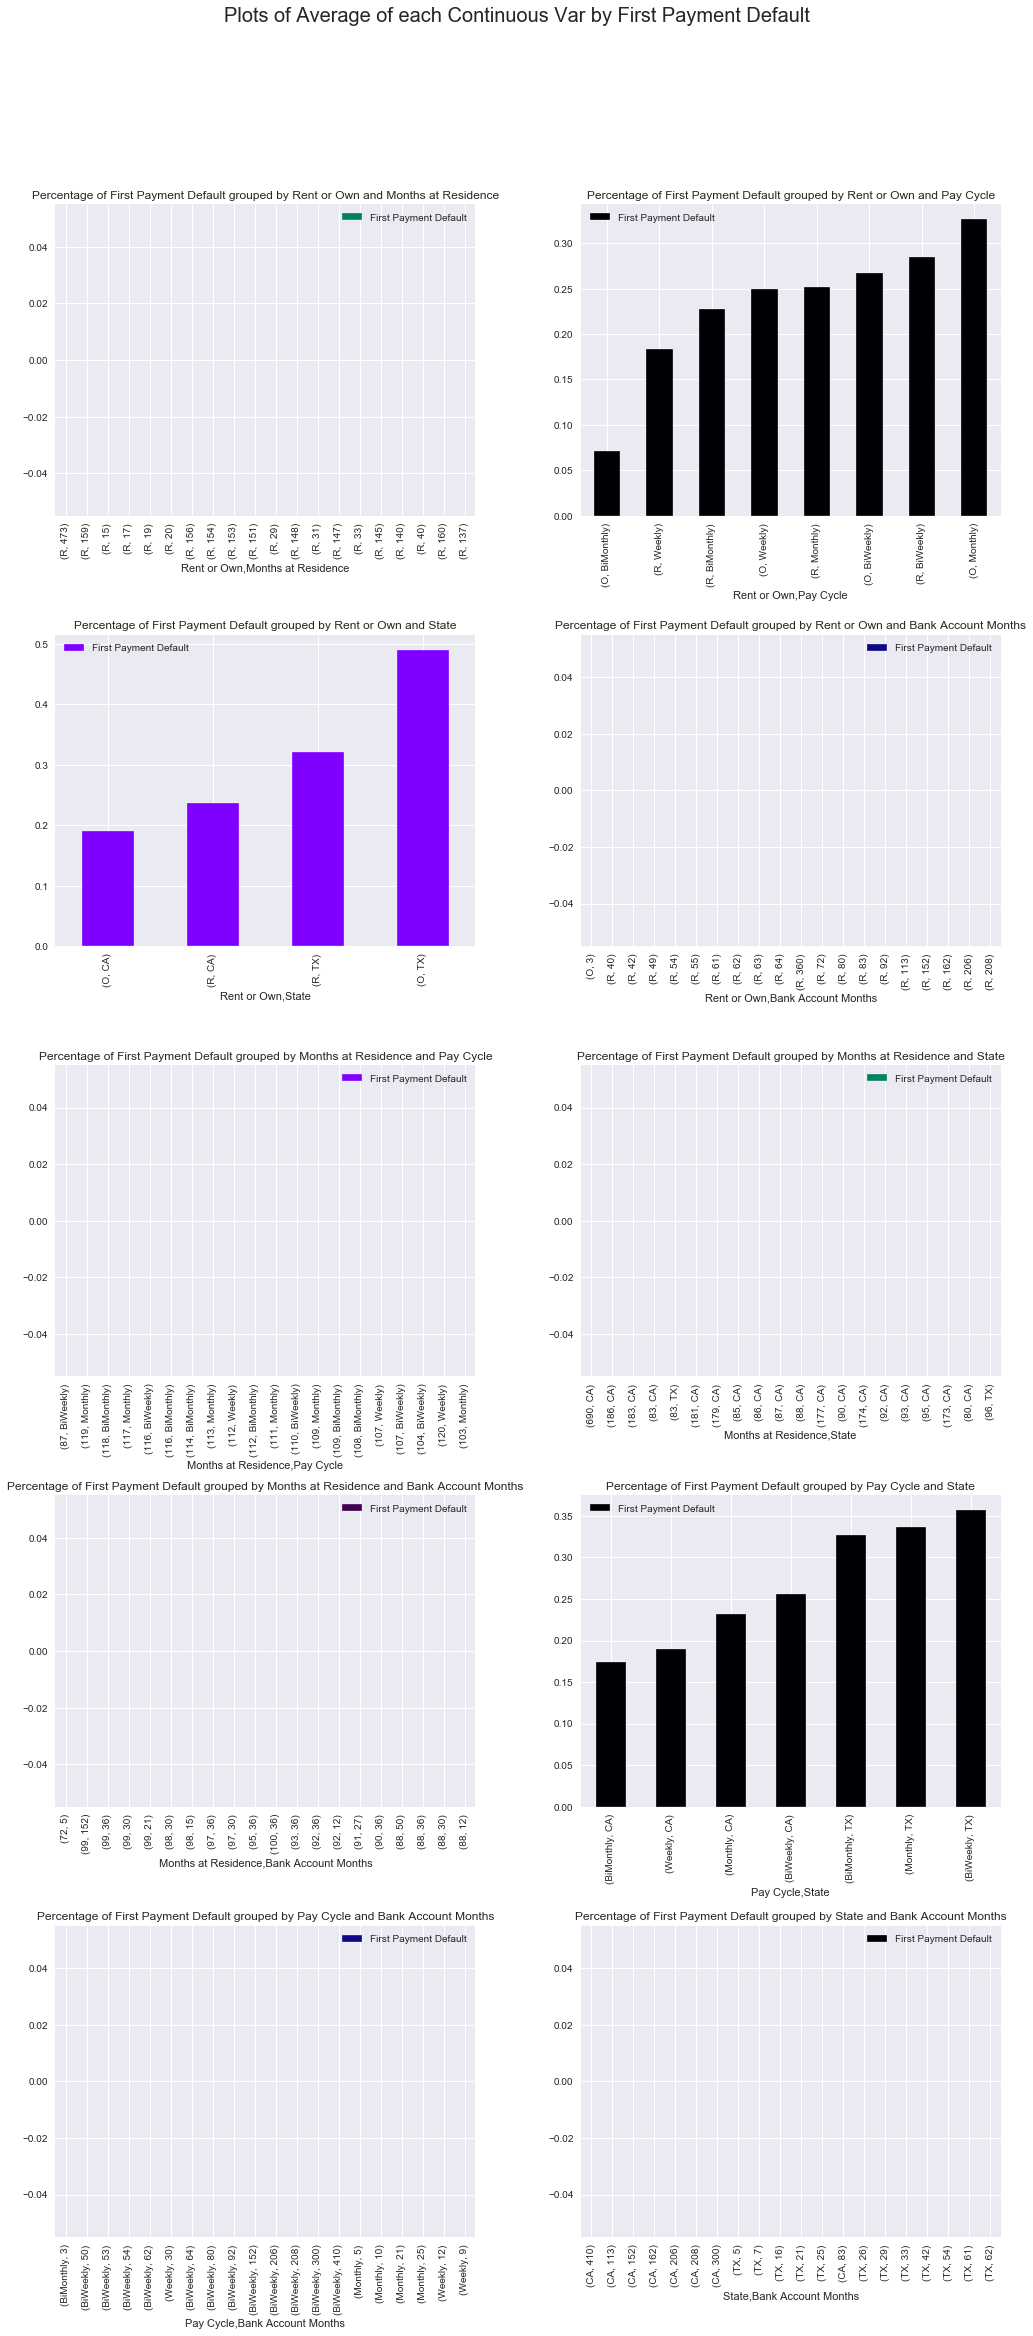

In [8]:
AV = AutoViz_Class()
dft = AV.AutoViz('Train.csv', sep=',', depVar='First Payment Default', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=1500,max_cols_analyzed=30)

### Data Cleansing

In [9]:
train.columns

Index(['SetID', 'Time of Application', 'State', 'Monthly Net Income',
       'Paycheck Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Loan Funded Date',
       'Loan Due Date', 'First Payment Default'],
      dtype='object')

In [10]:
new_train = train[['SetID','Time of Application', 'State', 'Monthly Net Income',
       'Paycheck Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Loan Due Date', 'First Payment Default']]
new_train.columns = ['SetID','Time_of_Application', 'State', 'Monthly_Net_Income',
       'Paycheck_Net_Income', 'Rent_or_Own', 'Months_at_Residence',
       'Bank_Account_Months', 'Pay_Cycle', 'Loan_Amount', 'Loan_Due_Date','First_Payment_Default']
new_train.head(5)
new_test = test[['SetID','Time of Application', 'State', 'Monthly Net Income',
       'Paycheck Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Loan Due Date']]
new_test.columns = ['SetID','Time_of_Application', 'State', 'Monthly_Net_Income',
       'Paycheck_Net_Income', 'Rent_or_Own', 'Months_at_Residence',
       'Bank_Account_Months', 'Pay_Cycle', 'Loan_Amount', 'Loan_Due_Date']
new_test.head(5)

SetID   Time_of_Application State  Monthly_Net_Income  Paycheck_Net_Income  \
0      1  2018-04-09T23:25:18Z    CA              1894.0                947.0   
1      4  2018-04-09T20:34:56Z    TX              5000.0               5000.0   
2     14  2018-04-09T17:41:37Z    TX              2500.0               2500.0   
3     19  2018-04-09T16:33:35Z    CA              2902.0               1451.0   
4     28  2018-04-09T14:51:15Z    CA              5000.0               5000.0   

  Rent_or_Own  Months_at_Residence  Bank_Account_Months Pay_Cycle  \
0           R                    8                   30  BiWeekly   
1           O                   36                   36   Monthly   
2           O                  108                    6   Monthly   
3           R                   48                   36  BiWeekly   
4           R                   12                   12   Monthly   

   Loan_Amount Loan_Due_Date  
0       300.00    2018-04-20  
1       642.46    2018-04-27  
2       644.24    2018-05-10  
3       300.00    2018-04-20  
4       235.30    2018-04-30

In [11]:
new_train['Time_of_Application'] = new_train['Time_of_Application'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
new_train['Loan_Due_Date'] = new_train['Loan_Due_Date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%y'))
new_train1 = pd.get_dummies(new_train[['SetID','State', 'Rent_or_Own', 'Pay_Cycle']])
new_train = new_train.merge(new_train1, how='inner', on ='SetID')
new_test['Time_of_Application'] = new_test['Time_of_Application'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
new_test['Loan_Due_Date'] = new_test['Loan_Due_Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
new_test1 = pd.get_dummies(new_test[['SetID','State', 'Rent_or_Own', 'Pay_Cycle']])
new_test = new_test.merge(new_test1, how='inner', on ='SetID')

In [12]:
new_train['Week_Day']= new_train['Time_of_Application'].apply(lambda x: x.weekday())
new_train['Day_Hour']= new_train['Time_of_Application'].apply(lambda x: x.hour)
new_train['Month_Day']= new_train['Time_of_Application'].apply(lambda x: x.day)
new_train['Default']= new_train['First_Payment_Default'].apply(lambda x: int(x))
new_test['Week_Day']= new_test['Time_of_Application'].apply(lambda x: x.weekday())
new_test['Day_Hour']= new_test['Time_of_Application'].apply(lambda x: x.hour)
new_test['Month_Day']= new_test['Time_of_Application'].apply(lambda x: x.day)
# new_test['Default']= new_test['First_Payment_Default'].apply(lambda x: int(x))

In [13]:
new_train1.head()

SetID  State_CA  State_TX  Rent_or_Own_O  Rent_or_Own_R  \
0    436         1         0              0              1   
1    615         0         1              0              1   
2   1251         1         0              0              1   
3    440         1         0              0              1   
4   1692         1         0              0              1   

   Pay_Cycle_BiMonthly  Pay_Cycle_BiWeekly  Pay_Cycle_Monthly  \
0                    0                   0                  1   
1                    0                   0                  1   
2                    0                   0                  1   
3                    0                   0                  1   
4                    0                   0                  0   

   Pay_Cycle_Weekly  
0                 0  
1                 0  
2                 0  
3                 0  
4                 1

In [14]:
new_train.columns

Index(['SetID', 'Time_of_Application', 'State', 'Monthly_Net_Income',
       'Paycheck_Net_Income', 'Rent_or_Own', 'Months_at_Residence',
       'Bank_Account_Months', 'Pay_Cycle', 'Loan_Amount', 'Loan_Due_Date',
       'First_Payment_Default', 'State_CA', 'State_TX', 'Rent_or_Own_O',
       'Rent_or_Own_R', 'Pay_Cycle_BiMonthly', 'Pay_Cycle_BiWeekly',
       'Pay_Cycle_Monthly', 'Pay_Cycle_Weekly', 'Week_Day', 'Day_Hour',
       'Month_Day', 'Default'],
      dtype='object')

In [15]:
train_final = new_train[['Monthly_Net_Income',
       'Paycheck_Net_Income', 'Months_at_Residence',
       'Bank_Account_Months', 'Loan_Amount', 'Loan_Due_Date',
       'State_CA',  'Rent_or_Own_O', 'Pay_Cycle_BiMonthly', 'Pay_Cycle_BiWeekly',
       'Pay_Cycle_Monthly', 'Week_Day', 'Month_Day',
       'Day_Hour', 'Default']]

In [16]:
x_train = new_train[['Monthly_Net_Income',
       'Paycheck_Net_Income', 'Months_at_Residence',
       'Bank_Account_Months', 'Loan_Amount', 'State_CA',  'Rent_or_Own_O', 'Pay_Cycle_BiMonthly', 'Pay_Cycle_BiWeekly',
       'Pay_Cycle_Monthly', 'Week_Day', 'Month_Day',
       'Day_Hour']]
y_train = new_train[['Default']]
x_test = new_test[['Monthly_Net_Income',
       'Paycheck_Net_Income', 'Months_at_Residence',
       'Bank_Account_Months', 'Loan_Amount', 'State_CA',  'Rent_or_Own_O', 'Pay_Cycle_BiMonthly', 'Pay_Cycle_BiWeekly',
       'Pay_Cycle_Monthly', 'Week_Day', 'Month_Day',
       'Day_Hour']]

In [17]:
print(x_train.shape)
print(y_train.shape)

(1600, 13)
(1600, 1)


## Building models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer

In [19]:
#Test train split of training Data.
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x_train, y_train, test_size=0.2, random_state = 46)

In [20]:
print(x_train_df.shape)
print(y_train_df.shape)

(1280, 13)
(1280, 1)


In [21]:
dct=DecisionTreeClassifier()
dct.fit(x_train_df,y_train_df)
y_pred_dct=dct.predict(x_test_df)
dct_cnf_matrix = metrics.confusion_matrix(y_test_df, y_pred_dct)
print("Accuracy for Decision Tree:",metrics.accuracy_score(y_test_df, y_pred_dct))
dct_cnf_matrix

Accuracy for Decision Tree: 0.621875


array([[173,  61],
       [ 60,  26]], dtype=int64)

In [22]:
def random_forest(x):
    rfc = RandomForestClassifier(n_estimators=1200,class_weight='balanced',random_state=46,max_depth=x) 
    rfc.fit(x_train_df,y_train_df)
    y_pred_rfc = rfc.predict(x_test_df)
    y_train_pred_rfc = rfc.predict(x_train_df)
    rfc_cnf_matrix = metrics.confusion_matrix(y_test_df, y_pred_rfc)
#     print("Train Accuracy for Random Forest Classifier :",metrics.accuracy_score(y_train_df, y_train_pred_rfc))
#     print("Test Accuracy for Random Forest Classifier :",metrics.accuracy_score(y_test_df, y_pred_rfc))
    return metrics.accuracy_score(y_train_df, y_train_pred_rfc), metrics.accuracy_score(y_test_df, y_pred_rfc)
    # rfc_cnf_matrix

In [23]:
rfc_list = []
for i in range(1, 40, 2):
#     print("Max Depth Value: ", i)
    train_accuracy , test_accu = random_forest(i)
    rfc_list.append((i, train_accuracy, test_accu))

rfc_df = pd.DataFrame(rfc_list, columns=['Max_depth', 'Train_Accuracy', 'Test_Accuracy'])
# rfc_df    

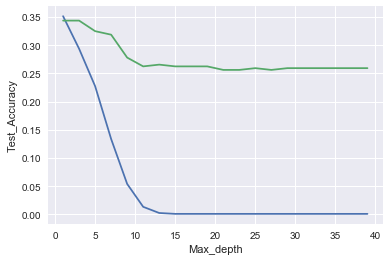

In [24]:
sbn.lineplot(rfc_df.Max_depth, 1-rfc_df.Train_Accuracy)
sbn.lineplot(rfc_df.Max_depth, 1-rfc_df.Test_Accuracy)

##### From the above screeplot we can see the max depth of 11 gives best results considering bias variance trade off.
+ With Max depth values lesser than 11, model is training lesser variance in train_data and with higher max depth values models are explaining almost 100% variance(which is overfit of model)

In [25]:
rfc = RandomForestClassifier(n_estimators=1200,class_weight='balanced',random_state=119,max_depth=11) 
rfc.fit(x_train_df,y_train_df)
y_pred_rfc = rfc.predict(x_test_df)
y_train_pred_rfc = rfc.predict(x_train_df)
rfc_cnf_matrix = metrics.confusion_matrix(y_test_df, y_pred_rfc)
print("Train Accuracy for Random Forest Classifier :",metrics.accuracy_score(y_train_df, y_train_pred_rfc))
print("Test Accuracy for Random Forest Classifier :",metrics.accuracy_score(y_test_df, y_pred_rfc))

Train Accuracy for Random Forest Classifier : 0.9859375
Test Accuracy for Random Forest Classifier : 0.740625


In [26]:
feature_list = list(x_train.columns)
importances = list(rfc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list[1:], importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
print('Top -20 features impacting Random forest model and their importance score :- \n',)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:15]];

Top -20 features impacting Random forest model and their importance score :- 

Variable: Months_at_Residence  Importance: 0.14
Variable: Paycheck_Net_Income  Importance: 0.13
Variable: Bank_Account_Months  Importance: 0.13
Variable: State_CA             Importance: 0.12
Variable: Day_Hour             Importance: 0.12
Variable: Loan_Amount          Importance: 0.09
Variable: Month_Day            Importance: 0.07
Variable: Rent_or_Own_O        Importance: 0.02
Variable: Pay_Cycle_BiMonthly  Importance: 0.02
Variable: Pay_Cycle_Monthly    Importance: 0.02
Variable: Week_Day             Importance: 0.02
Variable: Pay_Cycle_BiWeekly   Importance: 0.01


From the above Random Forest model, Months_at_Residence, Paycheck_Net_Income, Bank_Account_Months,State_CA, Day_Hour, Loan_Amount, Month_Day, Rent_or_Own were important features. All these cummulatively explaining 91% of variance(Explained in the above model).
+ Some of the values like hour of loan application and day of Month were reported as important features, but from the Domain knowledge, this looks spurious, and need to validate with a hypothesis testing.
+ Logistic regression will help in validating significance of regressor variables. 

As the below models were distance based algorithms, in the below chunks i am standadised the data using Normaliser function.

In [27]:
sclr = Normalizer()
sclr.fit(x_train)
x_train = pd.DataFrame(sclr.transform(x_train))
print(x_train.shape)
x_train.columns= ['Monthly_Net_Income',
       'Paycheck_Net_Income', 'Months_at_Residence',
       'Bank_Account_Months', 'Loan_Amount', 'State_CA',  'Rent_or_Own_O', 'Pay_Cycle_BiMonthly', 'Pay_Cycle_BiWeekly',
       'Pay_Cycle_Monthly', 'Week_Day', 'Month_Day',
       'Day_Hour']
x_train.head()

(1600, 13)


Monthly_Net_Income  Paycheck_Net_Income  Months_at_Residence  \
0            0.703108             0.703108             0.004219   
1            0.701123             0.701123             0.012019   
2            0.706816             0.706816             0.000000   
3            0.705928             0.705928             0.005647   
4            0.961608             0.240402             0.052261   

   Bank_Account_Months  Loan_Amount  State_CA  Rent_or_Own_O  \
0             0.002109     0.105466  0.000352            0.0   
1             0.012019     0.128588  0.000000            0.0   
2             0.001414     0.027719  0.000236            0.0   
3             0.002824     0.055368  0.000471            0.0   
4             0.014472     0.120603  0.000402            0.0   

   Pay_Cycle_BiMonthly  Pay_Cycle_BiWeekly  Pay_Cycle_Monthly  Week_Day  \
0                  0.0                 0.0           0.000352  0.000703   
1                  0.0                 0.0           0.000200  0.000801   
2                  0.0                 0.0           0.000236  0.000471   
3                  0.0                 0.0           0.000471  0.000941   
4                  0.0                 0.0           0.000000  0.000402   

   Month_Day  Day_Hour  
0   0.009844  0.005976  
1   0.004607  0.002604  
2   0.006597  0.002827  
3   0.013177  0.007059  
4   0.005226  0.001608

In [28]:
x_test = pd.DataFrame(sclr.transform(x_test))
print(x_test.shape)
x_test.columns= ['Monthly_Net_Income',
       'Paycheck_Net_Income', 'Months_at_Residence',
       'Bank_Account_Months', 'Loan_Amount', 'State_CA',  'Rent_or_Own_O', 'Pay_Cycle_BiMonthly', 'Pay_Cycle_BiWeekly',
       'Pay_Cycle_Monthly', 'Week_Day', 'Month_Day',
       'Day_Hour']
x_test.head()

(400, 13)


Monthly_Net_Income  Paycheck_Net_Income  Months_at_Residence  \
0            0.885431             0.442716             0.003740   
1            0.704185             0.704185             0.005070   
2            0.695327             0.695327             0.030038   
3            0.890463             0.445231             0.014729   
4            0.706712             0.706712             0.001696   

   Bank_Account_Months  Loan_Amount  State_CA  Rent_or_Own_O  \
0             0.014025     0.140248  0.000467       0.000000   
1             0.005070     0.090482  0.000000       0.000141   
2             0.001669     0.179183  0.000000       0.000278   
3             0.011046     0.092053  0.000307       0.000000   
4             0.001696     0.033258  0.000141       0.000000   

   Pay_Cycle_BiMonthly  Pay_Cycle_BiWeekly  Pay_Cycle_Monthly  Week_Day  \
0                  0.0            0.000467           0.000000       0.0   
1                  0.0            0.000000           0.000141       0.0   
2                  0.0            0.000000           0.000278       0.0   
3                  0.0            0.000307           0.000000       0.0   
4                  0.0            0.000000           0.000141       0.0   

   Month_Day  Day_Hour  
0   0.004207  0.010752  
1   0.001268  0.002817  
2   0.002503  0.004728  
3   0.002762  0.004910  
4   0.001272  0.001979

In [29]:
#Test train split of training Data.
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x_train, y_train, test_size=0.2, random_state = 46)

In [30]:
type(y_test_df)

pandas.core.frame.DataFrame

In [31]:
import statsmodels.api as sm
lr =sm.Logit(y_train_df, x_train_df)
result_lr =lr.fit()
print(result_lr.summary2())

Optimization terminated successfully.
         Current function value: 0.567816
         Iterations 21
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.018    
Dependent Variable:     Default             AIC:                 1479.6101
Date:                   2020-03-04 01:23    BIC:                 1546.6201
No. Observations:       1280                Log-Likelihood:      -726.81  
Df Model:               12                  LL-Null:             -739.92  
Df Residuals:           1267                LLR p-value:         0.0099569
Converged:              1.0000              Scale:               1.0000   
No. Iterations:         21.0000                                           
--------------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------
Monthly_Net_Income    -1.10

+ From the above summary metrics we can see coefficient of Day_Hour, Month_day were not statistically significant(at 5% Significance level).
+ Need to check with Domain experts team for individual coeffient signs and to further validate Multicollinearity effect.

In [32]:
lr=LogisticRegression()
lr.fit(x_train_df,y_train_df)
y_pred_lr=lr.predict(x_test_df)
lr_cnf_matrix = metrics.confusion_matrix(y_test_df, y_pred_lr)
print("Accuracy for Logistic Regression:",metrics.accuracy_score(y_test_df, y_pred_lr))
lr_cnf_matrix

Accuracy for Logistic Regression: 0.73125


array([[234,   0],
       [ 86,   0]], dtype=int64)

Deep Learning Models

In [33]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [34]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
history = AccuracyHistory()

In [35]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(13,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr = 0.0001),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [36]:
fit_score = model.fit(x_train_df, to_categorical(y_train_df),batch_size=200, epochs=1000, verbose=1, validation_data=(x_test_df, to_categorical(y_test_df)), callbacks=[history] )

Train on 1280 samples, validate on 320 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
1280/1280 [==============================] - 0s 310us/sample - loss: 0.6733 - acc: 0.7352 - val_loss: 0.6716 - val_acc: 0.7312
Epoch 2/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.6697 - acc: 0.7352 - val_loss: 0.6681 - val_acc: 0.7312
Epoch 3/1000
1280/1280 [==============================] - 0s 34us/sample - loss: 0.6660 - acc: 0.7352 - val_loss: 0.6646 - val_acc: 0.7312
Epoch 4/1000
1280/1280 [==============================] - 0s 23us/sample - loss: 0.6625 - acc: 0.7352 - val_loss: 0.6611 - val_acc: 0.7312
Epoch 5/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.6591 - acc: 0.7352 - val_loss: 0.6577 - val_acc: 0.7312
Epoch 6/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.6555 - acc: 0.7352 - val_loss: 0.6542 - val_acc: 0.7312
Epoch 7/1000
1280/1280 [==============================] - 0s 26us/samp

1280/1280 [==============================] - 0s 18us/sample - loss: 0.5779 - acc: 0.7352 - val_loss: 0.5809 - val_acc: 0.7312
Epoch 58/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5779 - acc: 0.7352 - val_loss: 0.5809 - val_acc: 0.7312
Epoch 59/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5779 - acc: 0.7352 - val_loss: 0.5809 - val_acc: 0.7312
Epoch 60/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5779 - acc: 0.7352 - val_loss: 0.5809 - val_acc: 0.7312
Epoch 61/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5779 - acc: 0.7352 - val_loss: 0.5809 - val_acc: 0.7312
Epoch 62/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5779 - acc: 0.7352 - val_loss: 0.5809 - val_acc: 0.7312
Epoch 63/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5779 - acc: 0.7352 - val_loss: 0.5809 - val_acc: 0.7312
Epoch 64/1000
1280/1280 [=========

1280/1280 [==============================] - 0s 20us/sample - loss: 0.5777 - acc: 0.7352 - val_loss: 0.5808 - val_acc: 0.7312
Epoch 116/1000
1280/1280 [==============================] - 0s 18us/sample - loss: 0.5777 - acc: 0.7352 - val_loss: 0.5808 - val_acc: 0.7312
Epoch 117/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5777 - acc: 0.7352 - val_loss: 0.5808 - val_acc: 0.7312
Epoch 118/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5777 - acc: 0.7352 - val_loss: 0.5808 - val_acc: 0.7312
Epoch 119/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5777 - acc: 0.7352 - val_loss: 0.5808 - val_acc: 0.7312
Epoch 120/1000
1280/1280 [==============================] - 0s 17us/sample - loss: 0.5777 - acc: 0.7352 - val_loss: 0.5808 - val_acc: 0.7312
Epoch 121/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5777 - acc: 0.7352 - val_loss: 0.5808 - val_acc: 0.7312
Epoch 122/1000
1280/1280 [==

1280/1280 [==============================] - 0s 18us/sample - loss: 0.5775 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 174/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5775 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 175/1000
1280/1280 [==============================] - 0s 23us/sample - loss: 0.5775 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 176/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5775 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 177/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5775 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 178/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5775 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 179/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5775 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 180/1000
1280/1280 [==

1280/1280 [==============================] - 0s 20us/sample - loss: 0.5773 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 232/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5772 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 233/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5773 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 234/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5773 - acc: 0.7352 - val_loss: 0.5807 - val_acc: 0.7312
Epoch 235/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5772 - acc: 0.7352 - val_loss: 0.5806 - val_acc: 0.7312
Epoch 236/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5772 - acc: 0.7352 - val_loss: 0.5806 - val_acc: 0.7312
Epoch 237/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5772 - acc: 0.7352 - val_loss: 0.5806 - val_acc: 0.7312
Epoch 238/1000
1280/1280 [==

Epoch 289/1000
1280/1280 [==============================] - 0s 24us/sample - loss: 0.5770 - acc: 0.7352 - val_loss: 0.5805 - val_acc: 0.7312
Epoch 290/1000
1280/1280 [==============================] - 0s 18us/sample - loss: 0.5770 - acc: 0.7352 - val_loss: 0.5805 - val_acc: 0.7312
Epoch 291/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5770 - acc: 0.7352 - val_loss: 0.5805 - val_acc: 0.7312
Epoch 292/1000
1280/1280 [==============================] - 0s 24us/sample - loss: 0.5770 - acc: 0.7352 - val_loss: 0.5805 - val_acc: 0.7312
Epoch 293/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5769 - acc: 0.7352 - val_loss: 0.5805 - val_acc: 0.7312
Epoch 294/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5770 - acc: 0.7352 - val_loss: 0.5805 - val_acc: 0.7312
Epoch 295/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5769 - acc: 0.7352 - val_loss: 0.5805 - val_acc: 0.7312
Epoch 296/100

1280/1280 [==============================] - 0s 18us/sample - loss: 0.5767 - acc: 0.7352 - val_loss: 0.5804 - val_acc: 0.7312
Epoch 348/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5767 - acc: 0.7352 - val_loss: 0.5804 - val_acc: 0.7312
Epoch 349/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5767 - acc: 0.7352 - val_loss: 0.5804 - val_acc: 0.7312
Epoch 350/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5767 - acc: 0.7352 - val_loss: 0.5804 - val_acc: 0.7312
Epoch 351/1000
1280/1280 [==============================] - 0s 18us/sample - loss: 0.5767 - acc: 0.7352 - val_loss: 0.5804 - val_acc: 0.7312
Epoch 352/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5767 - acc: 0.7352 - val_loss: 0.5804 - val_acc: 0.7312
Epoch 353/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5767 - acc: 0.7352 - val_loss: 0.5804 - val_acc: 0.7312
Epoch 354/1000
1280/1280 [==

1280/1280 [==============================] - 0s 20us/sample - loss: 0.5764 - acc: 0.7352 - val_loss: 0.5802 - val_acc: 0.7312
Epoch 406/1000
1280/1280 [==============================] - 0s 16us/sample - loss: 0.5764 - acc: 0.7352 - val_loss: 0.5802 - val_acc: 0.7312
Epoch 407/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5764 - acc: 0.7352 - val_loss: 0.5802 - val_acc: 0.7312
Epoch 408/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5764 - acc: 0.7352 - val_loss: 0.5802 - val_acc: 0.7312
Epoch 409/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5764 - acc: 0.7352 - val_loss: 0.5802 - val_acc: 0.7312
Epoch 410/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5764 - acc: 0.7352 - val_loss: 0.5802 - val_acc: 0.7312
Epoch 411/1000
1280/1280 [==============================] - 0s 18us/sample - loss: 0.5764 - acc: 0.7352 - val_loss: 0.5802 - val_acc: 0.7312
Epoch 412/1000
1280/1280 [==

Epoch 463/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5761 - acc: 0.7352 - val_loss: 0.5801 - val_acc: 0.7312
Epoch 464/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5761 - acc: 0.7352 - val_loss: 0.5801 - val_acc: 0.7312
Epoch 465/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5761 - acc: 0.7352 - val_loss: 0.5800 - val_acc: 0.7312
Epoch 466/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5760 - acc: 0.7352 - val_loss: 0.5801 - val_acc: 0.7312
Epoch 467/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5761 - acc: 0.7352 - val_loss: 0.5801 - val_acc: 0.7312
Epoch 468/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5761 - acc: 0.7352 - val_loss: 0.5801 - val_acc: 0.7312
Epoch 469/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5760 - acc: 0.7352 - val_loss: 0.5801 - val_acc: 0.7312
Epoch 470/100

1280/1280 [==============================] - 0s 20us/sample - loss: 0.5757 - acc: 0.7352 - val_loss: 0.5799 - val_acc: 0.7312
Epoch 522/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5757 - acc: 0.7352 - val_loss: 0.5799 - val_acc: 0.7312
Epoch 523/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5757 - acc: 0.7352 - val_loss: 0.5799 - val_acc: 0.7312
Epoch 524/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5757 - acc: 0.7352 - val_loss: 0.5799 - val_acc: 0.7312
Epoch 525/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5757 - acc: 0.7352 - val_loss: 0.5798 - val_acc: 0.7312
Epoch 526/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5757 - acc: 0.7352 - val_loss: 0.5799 - val_acc: 0.7312
Epoch 527/1000
1280/1280 [==============================] - 0s 18us/sample - loss: 0.5756 - acc: 0.7352 - val_loss: 0.5798 - val_acc: 0.7312
Epoch 528/1000
1280/1280 [==

1280/1280 [==============================] - 0s 19us/sample - loss: 0.5753 - acc: 0.7352 - val_loss: 0.5797 - val_acc: 0.7312
Epoch 580/1000
1280/1280 [==============================] - 0s 18us/sample - loss: 0.5753 - acc: 0.7352 - val_loss: 0.5798 - val_acc: 0.7312
Epoch 581/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5753 - acc: 0.7352 - val_loss: 0.5797 - val_acc: 0.7312
Epoch 582/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5753 - acc: 0.7352 - val_loss: 0.5797 - val_acc: 0.7312
Epoch 583/1000
1280/1280 [==============================] - 0s 27us/sample - loss: 0.5753 - acc: 0.7352 - val_loss: 0.5797 - val_acc: 0.7312
Epoch 584/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5752 - acc: 0.7352 - val_loss: 0.5797 - val_acc: 0.7312
Epoch 585/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5753 - acc: 0.7352 - val_loss: 0.5797 - val_acc: 0.7312
Epoch 586/1000
1280/1280 [==

1280/1280 [==============================] - 0s 20us/sample - loss: 0.5749 - acc: 0.7352 - val_loss: 0.5796 - val_acc: 0.7312
Epoch 638/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5748 - acc: 0.7352 - val_loss: 0.5796 - val_acc: 0.7312
Epoch 639/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5749 - acc: 0.7352 - val_loss: 0.5796 - val_acc: 0.7312
Epoch 640/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5749 - acc: 0.7352 - val_loss: 0.5796 - val_acc: 0.7312
Epoch 641/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5749 - acc: 0.7352 - val_loss: 0.5796 - val_acc: 0.7312
Epoch 642/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5748 - acc: 0.7352 - val_loss: 0.5796 - val_acc: 0.7312
Epoch 643/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5748 - acc: 0.7352 - val_loss: 0.5795 - val_acc: 0.7312
Epoch 644/1000
1280/1280 [==

1280/1280 [==============================] - 0s 19us/sample - loss: 0.5743 - acc: 0.7352 - val_loss: 0.5793 - val_acc: 0.7312
Epoch 696/1000
1280/1280 [==============================] - 0s 18us/sample - loss: 0.5743 - acc: 0.7352 - val_loss: 0.5793 - val_acc: 0.7312
Epoch 697/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5743 - acc: 0.7352 - val_loss: 0.5792 - val_acc: 0.7312
Epoch 698/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5743 - acc: 0.7352 - val_loss: 0.5792 - val_acc: 0.7312
Epoch 699/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5743 - acc: 0.7352 - val_loss: 0.5792 - val_acc: 0.7312
Epoch 700/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5743 - acc: 0.7352 - val_loss: 0.5792 - val_acc: 0.7312
Epoch 701/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5743 - acc: 0.7352 - val_loss: 0.5792 - val_acc: 0.7312
Epoch 702/1000
1280/1280 [==

1280/1280 [==============================] - 0s 20us/sample - loss: 0.5738 - acc: 0.7352 - val_loss: 0.5789 - val_acc: 0.7312
Epoch 754/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5738 - acc: 0.7352 - val_loss: 0.5789 - val_acc: 0.7312
Epoch 755/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5738 - acc: 0.7352 - val_loss: 0.5790 - val_acc: 0.7312
Epoch 756/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5738 - acc: 0.7352 - val_loss: 0.5789 - val_acc: 0.7312
Epoch 757/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5738 - acc: 0.7352 - val_loss: 0.5790 - val_acc: 0.7312
Epoch 758/1000
1280/1280 [==============================] - 0s 23us/sample - loss: 0.5737 - acc: 0.7352 - val_loss: 0.5789 - val_acc: 0.7312
Epoch 759/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5737 - acc: 0.7352 - val_loss: 0.5789 - val_acc: 0.7312
Epoch 760/1000
1280/1280 [==

1280/1280 [==============================] - 0s 24us/sample - loss: 0.5732 - acc: 0.7352 - val_loss: 0.5786 - val_acc: 0.7312
Epoch 812/1000
1280/1280 [==============================] - 0s 18us/sample - loss: 0.5732 - acc: 0.7352 - val_loss: 0.5786 - val_acc: 0.7312
Epoch 813/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5732 - acc: 0.7352 - val_loss: 0.5786 - val_acc: 0.7312
Epoch 814/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5732 - acc: 0.7352 - val_loss: 0.5787 - val_acc: 0.7312
Epoch 815/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5732 - acc: 0.7352 - val_loss: 0.5787 - val_acc: 0.7312
Epoch 816/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5731 - acc: 0.7352 - val_loss: 0.5787 - val_acc: 0.7312
Epoch 817/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5731 - acc: 0.7352 - val_loss: 0.5786 - val_acc: 0.7312
Epoch 818/1000
1280/1280 [==

1280/1280 [==============================] - 0s 20us/sample - loss: 0.5726 - acc: 0.7352 - val_loss: 0.5783 - val_acc: 0.7312
Epoch 870/1000
1280/1280 [==============================] - 0s 18us/sample - loss: 0.5726 - acc: 0.7352 - val_loss: 0.5783 - val_acc: 0.7312
Epoch 871/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5726 - acc: 0.7352 - val_loss: 0.5783 - val_acc: 0.7312
Epoch 872/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5725 - acc: 0.7352 - val_loss: 0.5783 - val_acc: 0.7312
Epoch 873/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5725 - acc: 0.7352 - val_loss: 0.5783 - val_acc: 0.7312
Epoch 874/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5725 - acc: 0.7352 - val_loss: 0.5783 - val_acc: 0.7312
Epoch 875/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5725 - acc: 0.7352 - val_loss: 0.5783 - val_acc: 0.7312
Epoch 876/1000
1280/1280 [==

1280/1280 [==============================] - 0s 20us/sample - loss: 0.5719 - acc: 0.7352 - val_loss: 0.5780 - val_acc: 0.7312
Epoch 928/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5720 - acc: 0.7352 - val_loss: 0.5780 - val_acc: 0.7312
Epoch 929/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5719 - acc: 0.7352 - val_loss: 0.5780 - val_acc: 0.7312
Epoch 930/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5720 - acc: 0.7352 - val_loss: 0.5780 - val_acc: 0.7312
Epoch 931/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5719 - acc: 0.7352 - val_loss: 0.5780 - val_acc: 0.7312
Epoch 932/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5719 - acc: 0.7352 - val_loss: 0.5780 - val_acc: 0.7312
Epoch 933/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5719 - acc: 0.7352 - val_loss: 0.5780 - val_acc: 0.7312
Epoch 934/1000
1280/1280 [==

1280/1280 [==============================] - 0s 21us/sample - loss: 0.5713 - acc: 0.7352 - val_loss: 0.5777 - val_acc: 0.7312
Epoch 986/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5713 - acc: 0.7352 - val_loss: 0.5777 - val_acc: 0.7312
Epoch 987/1000
1280/1280 [==============================] - 0s 19us/sample - loss: 0.5713 - acc: 0.7352 - val_loss: 0.5777 - val_acc: 0.7312
Epoch 988/1000
1280/1280 [==============================] - 0s 21us/sample - loss: 0.5713 - acc: 0.7352 - val_loss: 0.5776 - val_acc: 0.7281
Epoch 989/1000
1280/1280 [==============================] - 0s 22us/sample - loss: 0.5712 - acc: 0.7352 - val_loss: 0.5776 - val_acc: 0.7281
Epoch 990/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5712 - acc: 0.7352 - val_loss: 0.5776 - val_acc: 0.7281
Epoch 991/1000
1280/1280 [==============================] - 0s 20us/sample - loss: 0.5712 - acc: 0.7352 - val_loss: 0.5776 - val_acc: 0.7281
Epoch 992/1000
1280/1280 [==

In [37]:
print("Test Accuracy Mean : ",np.mean(fit_score.history['val_acc']))

Test Accuracy Mean :  0.7312062


### Final Model

+ From the above different models, we can see Random Forest resulting reasonable accuracy(74%) and not voilating any assumptions (its an ensumble method of classification by constructing Multiple Decision trees -Sequence of branching on various characteristics).
+ From the Logistic regression model summary report, Model metrics like Psudo-R Squared is low(1.8%), AIC & BIC were higher than DF and sign individual coefficients need to validated,  this is not the model to go with for final predictions.
+ Deep learning models are not giving great accuracy results(compared to RF) and will be better of incase huge data.
+ Using Random Forest model, trained with full train, to predict the first payment default of Test data.

In [38]:
#Final model
rfc = RandomForestClassifier(n_estimators=1200,class_weight='balanced',random_state=119,max_depth=11) 
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)


In [39]:
y_test= pd.Series(y_pred_rfc)
test['First Payment Default']= y_test
test['First Payment Default']= test.apply(lambda row: 'True' if row['First Payment Default']==1 else 'False', axis=1)

In [42]:
test.head(5)

SetID   Time of Application State  Monthly Net Income  Paycheck Net Income  \
0      1  2018-04-09T23:25:18Z    CA              1894.0                947.0   
1      4  2018-04-09T20:34:56Z    TX              5000.0               5000.0   
2     14  2018-04-09T17:41:37Z    TX              2500.0               2500.0   
3     19  2018-04-09T16:33:35Z    CA              2902.0               1451.0   
4     28  2018-04-09T14:51:15Z    CA              5000.0               5000.0   

  Rent or Own  Months at Residence  Bank Account Months Pay Cycle  \
0           R                    8                   30  BiWeekly   
1           O                   36                   36   Monthly   
2           O                  108                    6   Monthly   
3           R                   48                   36  BiWeekly   
4           R                   12                   12   Monthly   

   Loan Amount Loan Funded Date Loan Due Date First Payment Default  
0       300.00       2018-04-10    2018-04-20                 False  
1       642.46       2018-04-10    2018-04-27                  True  
2       644.24       2018-04-09    2018-05-10                 False  
3       300.00       2018-04-09    2018-04-20                 False  
4       235.30       2018-04-09    2018-04-30                 False

In [41]:
test.to_csv("Test_With_Predicted.csv", index=False)